# Importing the libraries:

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# EDA:

In [6]:
# loading the data:
data = pd.read_csv("C:/Users/nn474/OneDrive/Desktop/Machinelearning/heart_disease_data.csv")

In [7]:
# Fist 5 rows:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
# last 5 rows :
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [9]:
# number rows and columns:
data.shape

(303, 14)

In [11]:
# data information:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
# checking the missing values:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
# statisical measures:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [14]:
# checking the distribution of Target Variable:
data['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

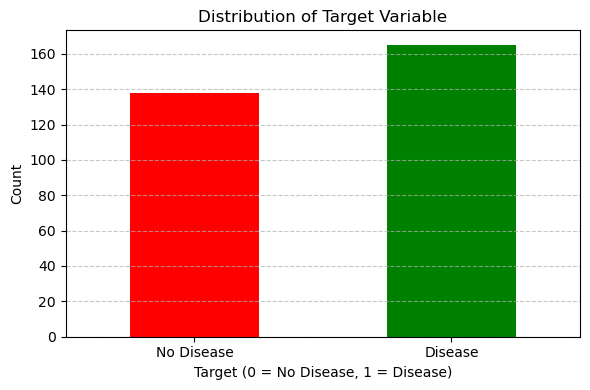

In [17]:
data['target'].value_counts().sort_index().plot(
    kind='bar',
    color=['red', 'green'],
    figsize=(6, 4)
)

plt.title('Distribution of Target Variable')
plt.xlabel('Target (0 = No Disease, 1 = Disease)')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Disease', 'Disease'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 1 -> Heart Disease
# 0 -> No Heart Disease

Splitting the Features and Target Variable:

In [21]:
X = data.drop(columns='target', axis=1)
Y = data['target']

Splitting the data into training and test sets:

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42, stratify = Y)


In [23]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (212, 13) (91, 13)


Model Training:

Logistic Regression:

In [24]:
model = LogisticRegression(max_iter=1000)
# trainig the model with the training data: 
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

Model Evaluation:

Accuracy Score:

In [25]:
# Accuracy on the training data: 
Y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(Y_train, Y_train_pred)
print(f"Training Accuracy: {train_accuracy:.2f}")
# Accuracy on the testing data:
Y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(Y_test, Y_test_pred)
print(f"Testing Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.88
Testing Accuracy: 0.75


In [28]:
# Predict on the test data:
Y_prediction = model.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(Y_test, Y_prediction))


# Calculate prediction accuracy:
accuracy = accuracy_score(Y_test, Y_prediction)
print(f'Prediction Accuracy Score: {accuracy:.4f}')

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.68      0.71        41
           1       0.75      0.80      0.78        50

    accuracy                           0.75        91
   macro avg       0.75      0.74      0.74        91
weighted avg       0.75      0.75      0.75        91

Prediction Accuracy Score: 0.7473


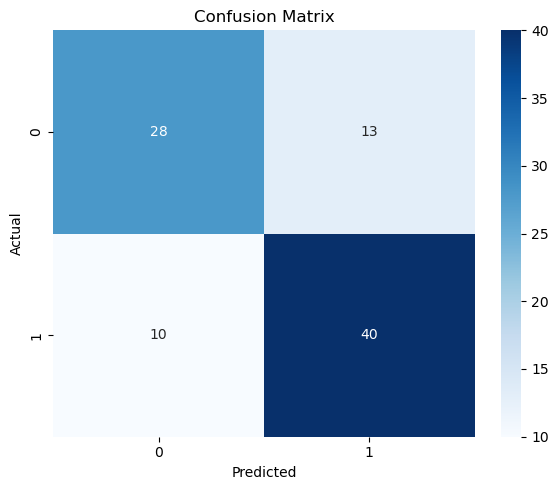

In [31]:
# Confision Matrix:
cm = confusion_matrix(Y_test, Y_prediction)
plt.figure(figsize = (6,5))
sns.heatmap(cm, annot = True, fmt ='d', cmap = 'Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

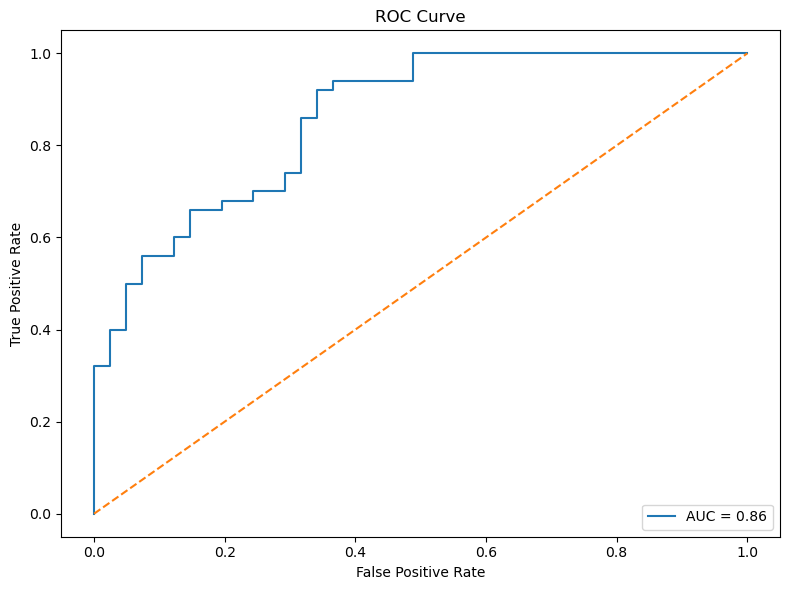

In [34]:
# Roc Curve:
Y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_proba)
roc_auc= auc (fpr,tpr) 

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

Feature Coefficients:
cp          1.041907
slope       0.597600
restecg     0.178271
fbs         0.109110
thalach     0.030109
age        -0.001922
trestbps   -0.004720
chol       -0.010271
oldpeak    -0.572443
ca         -0.595892
exang      -0.845246
thal       -0.941712
sex        -1.343947
dtype: float64

Feature Coefficients (including intercept):
intercept    1.288924
cp           1.041907
slope        0.597600
restecg      0.178271
fbs          0.109110
thalach      0.030109
age         -0.001922
trestbps    -0.004720
chol        -0.010271
oldpeak     -0.572443
ca          -0.595892
exang       -0.845246
thal        -0.941712
sex         -1.343947
dtype: float64


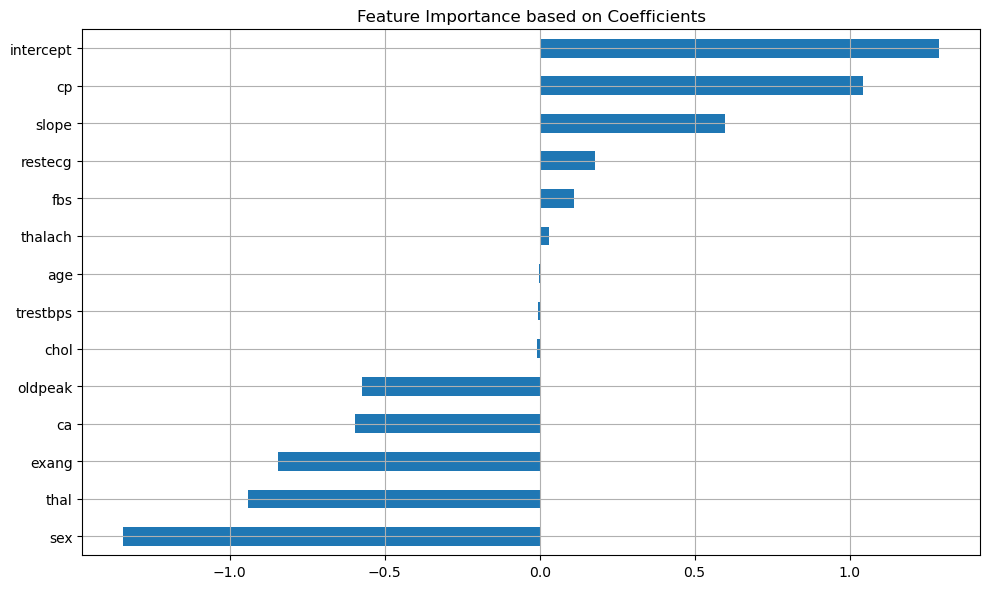

In [39]:
# Display model coefficients for insight 
coefficients = pd.Series(model.coef_[0], index=X.columns)
print('Feature Coefficients:')
print(coefficients.sort_values(ascending=False))
print()

# Create a Series with all coefficients including the intercept
all_features = ['intercept'] + X.columns.tolist()
all_coefficients = pd.Series([model.intercept_[0]] + list(model.coef_[0]), index=all_features)

print('Feature Coefficients (including intercept):')
print(all_coefficients.sort_values(ascending=False))

# Bar plot of coefficient:
plt.figure(figsize=(10, 6))
all_coefficients.sort_values().plot(kind='barh', grid=True)
plt.title('Feature Importance based on Coefficients')
plt.tight_layout()
plt.show()


In [ ]:
import statsmodels.api as sm
import pandas as pd

# Giả sử X là DataFrame, y là Series
X_with_const = sm.add_constant(X)  # Thêm intercept (cột hệ số chặn)

logit_model = sm.Logit(y, X_with_const)
result = logit_model.fit()

# The report with p-values: 
print(result.summary())



Optimization terminated successfully.
         Current function value: 0.348904
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  303
Model:                          Logit   Df Residuals:                      289
Method:                           MLE   Df Model:                           13
Date:                Wed, 07 May 2025   Pseudo R-squ.:                  0.4937
Time:                        14:49:26   Log-Likelihood:                -105.72
converged:                       True   LL-Null:                       -208.82
Covariance Type:            nonrobust   LLR p-value:                 7.262e-37
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4505      2.571      1.342      0.180      -1.590       8.490
age           -0.0049      0.

Building a Predictive System:
